# Final Project Challenge

In [ ]:
%matplotlib inline
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

plt.rc('figure', figsize=(10, 8))
np.set_printoptions(precision=4, suppress=True)

### Input Data

อ่านไฟล์ train และ test

In [ ]:
train_dt = pd.read_csv('train_file.csv') 
test_dt = pd.read_csv('test_file.csv')

In [ ]:
train_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Data Infomation

ดูข้อมูลทั่วๆไปของ train และ test data

In [ ]:
train_dt.info() #ดูข้อมูลทั้งหมดข้อตาราง train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_dt.shape #ดูขนาดข้อมูลทั้งหมด 

(614, 13)

In [ ]:
test_dt.info() #ดูข้อมูลทั้งหมดข้อตาราง test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
test_dt.shape #ดูขนาดข้อมูลทั้งหมด 

(367, 12)

### Data Transformation

In [ ]:
test_dt.isnull().any() #หาว่ามีข้อมูลตรงไหนบ้างที่ null

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [ ]:
train_dt.isnull().any() #หาว่ามีข้อมูลตรงไหนบ้างที่ null

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

พบว่าเจอค่า null ทั้งหมด 7 ที่ได้แก่ 
- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

In [ ]:
train_dt.isnull().sum() #ดูว่ามี null กี่ row

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
pcc = (train_dt.isnull().sum() / train_dt.isnull().count() * 100)
result  = pcc.sum()
print("null =" , result , "%")

null = 24.267100977198695 %


ข้อมูล null คิดเป็น 24.26% จากข้อมูลทั้งหมด ดังนั้นเราไม่ควรลบ


In [ ]:
train_dt.shape #ดูขนาดข้อมูลทั้งหมด 

(614, 13)

In [ ]:
train_dt.duplicated().any() #ดูว่ามีข้อมูลซ้ำกันหรือไม่

False

In [ ]:
#แปลงค่าข้อมูลบางส่วน
##### Train ######
train_dt['Gender'] = train_dt['Gender'].fillna("Unknown") 
train_dt['Married'] = train_dt['Married'].fillna("No") 
train_dt['Self_Employed'] = train_dt['Self_Employed'].fillna("Unknown") 
##### Test ######
test_dt['Gender'] = test_dt['Gender'].fillna("Unknown") 
test_dt['Self_Employed'] = test_dt['Self_Employed'].fillna("Unknown") 

ดูค่าว่า เมื่อเราเปลี่ยนค่าใน column แล้วค่าข้างในจะเป็นอย่างไร

In [ ]:
train_dt['Gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [ ]:
test_dt['Gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

เช็คว่าค่าใน train และ test มีค่า Null อยู่หรือไม่

In [ ]:
train_dt.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
test_dt.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [ ]:
#ทำการเติมข้อมูลที่ขาดหายไปของ Train
train_dt['LoanAmount'] = train_dt['LoanAmount'].fillna(train_dt['LoanAmount'].mean()) #เราจะเติม null ของ loan amount โดยใช้ค่าเฉลี่ย 
train_dt['Credit_History'] = train_dt['Credit_History'].fillna(train_dt['Credit_History'].mean()) #เราจะเติม null ของ Credit_History โดยใช้ค่าเฉลี่ย 
train_dt['Loan_Amount_Term'] = train_dt['Loan_Amount_Term'].fillna(train_dt['Loan_Amount_Term'].mean()) #เราจะเติม null ของ Loan_Amount_Term โดยใช้ค่าเฉลี่ย 

#ทำการเติมข้อมูลที่ขาดหายไปของ Test
test_dt['LoanAmount'] = test_dt['LoanAmount'].fillna(test_dt['LoanAmount'].mean()) #เราจะเติม null ของ loan amount โดยใช้ค่าเฉลี่ย 
test_dt['Credit_History'] = test_dt['Credit_History'].fillna(test_dt['Credit_History'].mean()) #เราจะเติม null ของ Credit_History โดยใช้ค่าเฉลี่ย 
test_dt['Loan_Amount_Term'] = test_dt['Loan_Amount_Term'].fillna(test_dt['Loan_Amount_Term'].mean()) #เราจะเติม null ของ Loan_Amount_Term โดยใช้ค่าเฉลี่ย 


In [ ]:
#ทำการเปลี่ยนค่าของ Dependents จากค่า string ให้เป็น int
#เราจะให้ 0 คือ 0 คน
#เราจะให้ 1 คือ 1 คน
#เราจะให้ 2 คือ 2 คน
#เราจะให้ 3 คือ 3 คนขึ้นไป(แทน 3+ อันเก่า)

#train
train_dt['Dependents'] = train_dt['Dependents'].fillna("0") 
train_dt['Dependents'][train_dt['Dependents'] == "3+"] = "3"
train_dt['Dependents'] = train_dt['Dependents'].astype('int64')

#test
test_dt['Dependents'] = test_dt['Dependents'].fillna("0") 
test_dt['Dependents'][test_dt['Dependents'] == "3+"] = "3"
test_dt['Dependents'] = test_dt['Dependents'].astype('int64')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


columns Dependents เป็น datatype int 64 

In [ ]:
train_dt['Dependents'].unique()

array([0, 1, 2, 3])

In [ ]:
test_dt['Dependents'].unique()

array([0, 1, 2, 3])

In [ ]:
train_dt['Dependents'].dtypes

dtype('int64')

In [ ]:
test_dt['Dependents'].dtypes

dtype('int64')

ต้องการดูทั้ง train และ test ว่ายังมี null อยู่หรือป่าว

In [ ]:
train_dt.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
test_dt.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

### Data Visualization EDA

In [ ]:
train_dt.describe() #ความสัมพันธ์ของตาราง train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- ผู้กู้ส่วนใหญ่ 50% มักจะกู้เพียงตัวคนเดียว และ 75% จะมีผู้ร่วมกู้ 1 คน 
- จะพบว่าโดยเฉลี่ยแล้วรายได้ของผู้กู้ยืม(ApplicantIncome) คือ 5403 ซึ่ง 50% ของผู้กู้ยืม มีรายได้ 3812 และรายได้ของผู้กู้ยืมต่ำที่สุด คือ 150 และสูงที่สุด คือ 81000
- จะพบว่าผู้กู้ยืมร่วมโดยเฉลี่ยแล้วรายได้ของผู้กู้ยืมร่วม(CoaaplicantIncome) คือ 1621 ซึ่ง 50% ของผู้กู้ยืมร่วม มีรายได้ 1188 และรายได้ของผู้กู้ยืมร่วมที่ต่ำที่สุด คือ 0 และสูงที่สุด คือ 41667
- จะพบว่าโดยเฉลี่ยแล้วจำนวนเงินกู้(LoanAmount) คือ 146 ซึ่ง 50% ของผู้กู้ยืมมีจำนวนเงินกู้เท่ากับ 129 ซึ่งจำนวนเงินกู้ที่ต่ำที่สุด คือ 9 และสูงที่สุด คือ 700
- จะพบว่าระยะเวลาของการกู้เงินโดยเฉลี่ย คือ 342 วัน และมีจำนวนวันที่กู้ต่ำที่สุด คือ 12 วัน และสูงสุด 480 วัน ซึ่ง 50% จะมีระยะเวลาการกู้ 360 วัน
- จะพบว่าผู้ที่กู้ส่วนใหญ่(เกิน75%)มีเครดิตการกู้ที่ดี

In [ ]:
train_dt.describe(include="object") #ดูค่าทางสถิติต่างๆของข้อมูลที่เป็น object

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001570,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


- พบว่าผู้กู้ส่วนใหญ่เป็นเพศชายซึ่งคิดเป็นจำนวน 489 คน จาก 614 คน
- ผู้กู้ส่วนใหญ่แต่งงานแล้ว คิดเป็นจำนวน 398 คน จาก 614 คน
- ผู้กู้ส่วนใหญ่ซึ่งเป็นจำนวน 480 คน จาก 614 คน จบการศึกษาแล้ว
- ผู้กู้ส่วนใหญ่มีอาชีพเป็นหลักแหล่ง ไม่ทำอาชีพอิสระ ซึ่งมีจำนวนมากถึง 500 จาก 614 คน
- ผู้กู้ส่วนใหญ่มักมีทรัพย์สมบัติ คือ พื้นที่หรือบ้านในที่กึ่งเมืองกึ่งชุมชน

กราฟแสดงความสัมพันธ์ระหว่าง Education และ Loan Status


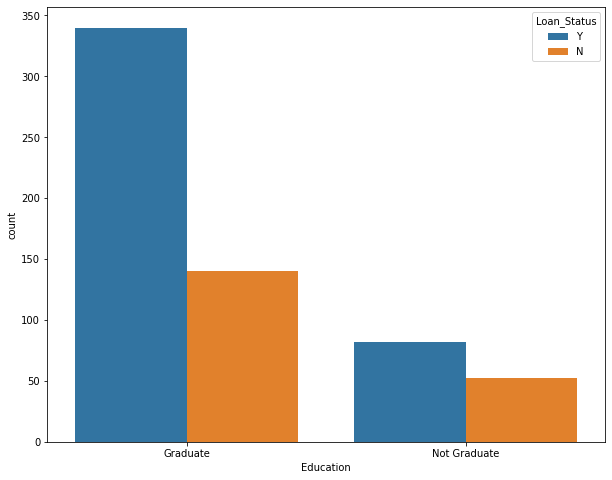

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=train_dt)

กราฟแสดงความสัมพันธ์ระหว่าง Married และ Loan Status




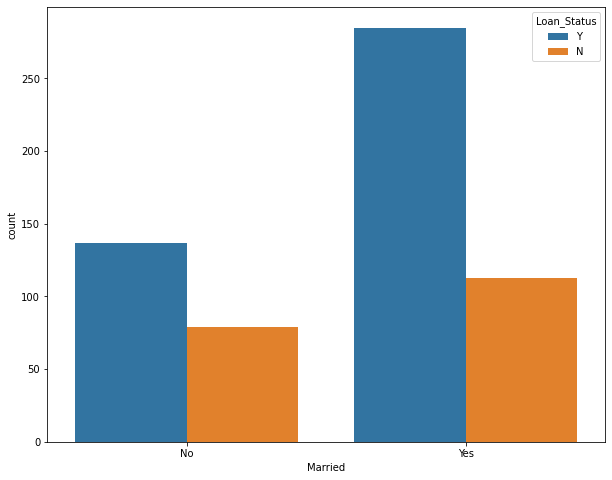

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=train_dt)

กราฟแสดงความสัมพันธ์ระหว่าง 5 columns : Dependents, ApplicantIncome, CoapplicantIncome,LoanAmount, Loan Amount Term และ Credit_History

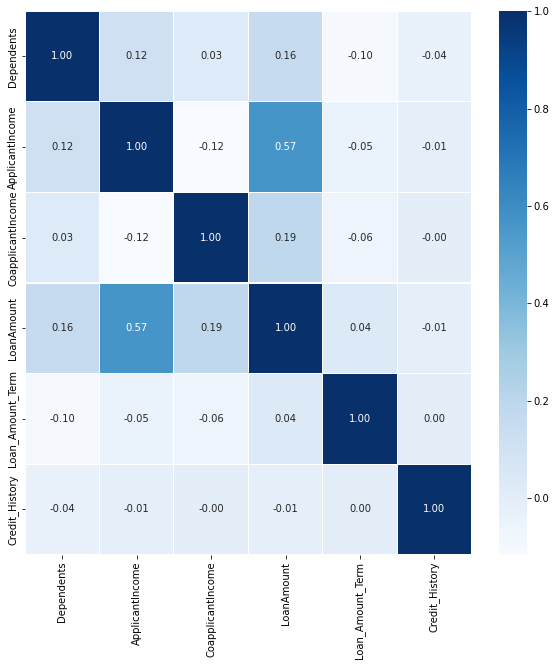

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_dt.corr(),ax=ax,annot= True,linewidth= 0.02,fmt='.2f',cmap = 'Blues')
plt.show()

### Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
train_dt.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
status = ['Y','N']  #ทำการกำหนดว่า status จะมีค่าเป็น Y และ N

In [ ]:
ordi = OrdinalEncoder(categories=[status])

In [ ]:
ordi.fit(train_dt[['Loan_Status']]) 

OrdinalEncoder(categories=[['Y', 'N']])

In [ ]:
ordi.transform(train_dt[['Loan_Status']]) #ดูผลลัพธ์จากการกำหนดค่า โดย Y เป็น 0 และ N เป็น 1

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [ ]:
train_dt[['Gender','Married','Education','Self_Employed','Property_Area']].head() #ต้องการรู้ว่าcolumnsไหนยังไม่เป็นตัวเลข

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban


In [ ]:
#ทำ onehot encoder เพื่อเปลี่ยน column ที่ต้องการให้เป็นตัวเลข
onehot =  make_pipeline(OneHotEncoder())
preprocessing = ColumnTransformer(
    [('5type', onehot, ['Gender','Married','Education','Self_Employed','Property_Area']),], remainder='passthrough')

#set ค่า X_pred ไว้ทำ model X_test ไปทำการ testing
X_pred = preprocessing.fit_transform(train_dt)
X_test = preprocessing.fit_transform(test_dt)

In [ ]:
x_pred_dt=pd.DataFrame(X_pred)
x_pred_dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,1,0,1,0,1,0,1,0,0,0,0,1,LP001002,0,5849,0,146.412,360,1,Y
1,0,1,0,0,1,1,0,1,0,0,1,0,0,LP001003,1,4583,1508,128,360,1,N
2,0,1,0,0,1,1,0,0,0,1,0,0,1,LP001005,0,3000,0,66,360,1,Y
3,0,1,0,0,1,0,1,1,0,0,0,0,1,LP001006,0,2583,2358,120,360,1,Y
4,0,1,0,1,0,1,0,1,0,0,0,0,1,LP001008,0,6000,0,141,360,1,Y


In [ ]:
X_test_dt = pd.DataFrame(X_test)
X_test_dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,1,1,0,1,0,0,0,0,1,LP001015,0,5720,0,110,360,1
1,0,1,0,0,1,1,0,1,0,0,0,0,1,LP001022,1,3076,1500,126,360,1
2,0,1,0,0,1,1,0,1,0,0,0,0,1,LP001031,2,5000,1800,208,360,1
3,0,1,0,0,1,1,0,1,0,0,0,0,1,LP001035,2,2340,2546,100,360,0.825444
4,0,1,0,1,0,0,1,1,0,0,0,0,1,LP001051,0,3276,0,78,360,1


In [ ]:
#drop columns ที่ไม่ต้องการใช้
x_pred_dt = x_pred_dt.drop(13,1)
x_pred_dt = x_pred_dt.drop(20,1)
X_test_dt = X_test_dt.drop(13,1)

In [ ]:
x_pred_dt.shape
X_test_dt.shape

(367, 19)

### Model

Model ที่กลุ่มเราเลือกคือ RandomForest, Tree และ AdaBoostClassifier หลังจากนั้นเอามา ensemble โดยใช้ Voting Classifier แบบ hard ในการตัดสินใจ

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#นำค่าที่ต้องการมาใส่ใน x y และ split เป็น train และ test set
x = x_pred_dt 
y = train_dt['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(x,y)

Declare classifier

In [ ]:
forest = RandomForestClassifier(n_estimators = 1000, criterion='entropy', oob_score=True, random_state=None,n_jobs=-1)
tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.2, random_state=0)

Model building using ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
model_predict =  VotingClassifier(estimators = [('forest',forest),('tree',tree),('adaboost', ada)], voting ='hard')
model_predict.fit(X_train, y_train)

VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     oob_score=True)),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=2)),
                             ('adaboost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=2),
                                                 learning_rate=0.2,
                                                 n_estimators=500,
                                                 random_state=0))])

In [ ]:
model_predict.score(X_test,y_test) #บอก model accuracy จากการใช้ test set prediction

0.8116883116883117

เอา test ที่ต้องการส่ง Submission ส่งเข้า list ก่อนนำเข้าไฟล์ csv 

In [ ]:
result =[]
for i in range(X_test_dt.shape[0]):
  result.append(model_predict.predict(X_test_dt.loc[[i]])[0])



### Submission file



หลังจากเอา test set เข้า list แล้วนำ list นั้นไปเข้า file csv เพื่อส่งขึ้น - https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [ ]:
submit = pd.DataFrame(columns=['Loan_ID','Loan_Status']) #เอาแค่ colmuns Loan_ID และ Loan_Status

In [ ]:
submit['Loan_ID'] = test_dt['Loan_ID']

In [ ]:
submit['Loan_Status']= result

In [ ]:
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
submit.to_csv('submission_file.csv',index=False)